In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image
import matplotlib.pyplot as plt

Using TensorFlow backend.


Training On Data2 and Data4 without Data Generator. Validating on Data3

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), data_format = 'channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
train_dir = "/home/john/Desktop/weedeater/data2"
val_dir = "/home/john/Desktop/weedeater/data2"
save_dir = "/home/john/Desktop/weedeater/models"

In [4]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1/255.0)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (200, 200),
                                                   batch_size = batch_size,
                                                    shuffle=True,
                                                   class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size = (200, 200),
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical')

Found 24480 images belonging to 5 classes.
Found 24480 images belonging to 5 classes.


In [5]:
model.fit_generator(generator = train_generator,
                    steps_per_epoch = 2000//batch_size,
                    epochs = 50,
                    validation_data = validation_generator,
                    validation_steps = 600//batch_size)

model.save_weights(save_dir + "/sec_model.h5")

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
62/62 [==============================] - 6s 99ms/step - loss: 1.2085 - acc: 0.5121 - val_loss: 0.6170 - val_acc: 0.7483
Epoch 2/50
62/62 [==============================] - 4s 67ms/step - loss: 0.6849 - acc: 0.7172 - val_loss: 0.2930 - val_acc: 0.8941
Epoch 3/50
62/62 [==============================] - 4s 65ms/step - loss: 0.4953 - acc: 0.8155 - val_loss: 0.2125 - val_acc: 0.9167
Epoch 4/50
62/62 [==============================] - 4s 63ms/step - loss: 0.3527 - acc: 0.8644 - val_loss: 0.2271 - val_acc: 0.8906
Epoch 5/50
62/62 [==============================] - 4s 68ms/step - loss: 0.2658 - acc: 0.8972 - val_loss: 0.1566 - val_acc: 0.9340
Epoch 6/50
62/62 [==============================] - 4s 67ms/step - loss: 0.2579 - acc: 0.9052 - val_loss: 0.1099 - val_acc: 0.9722
Epoch 7/50
62/62 [==============================] - 4s 68ms/step - loss: 0.1986 - acc: 0.9229 - val_loss: 0.1014 - val_acc: 0.9601
Epoch 8/50
62/62 [=================

In [6]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

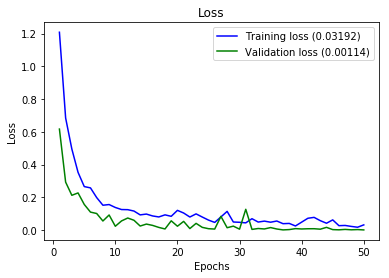

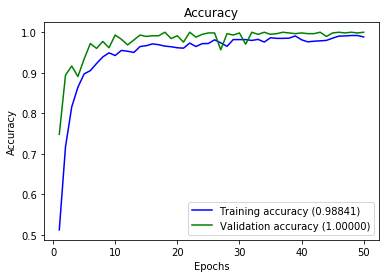

In [7]:
plot_history(model.history)